In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import scipy
import geopandas as gpd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [90]:
# Clean Income and population dataset
Income = pd.read_csv('Phoenix_Pop_Income.csv')
IP = Income[['Households_Mean_income','Households_Median_income','ZIP_CODE','Total_Pop']]
IP['ZIP_CODE'] = IP['ZIP_CODE'].astype(str)
IP = IP.set_index('ZIP_CODE')
IP = IP.rename(columns={'Total_Pop':'Population', 'Households_Mean_income':'Mean_Income', 'Households_Median_income':'Median_Income'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [91]:
# Clean Categories dataset
Categories = pd.read_csv('Top_Category_per_Zip_Freq.csv')

In [92]:
pd.set_option('display.max_rows', None)
Categories

,Unnamed: 0,Zip,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top20,Top21,Top22,Top23,Top24,Top25,Top26,Top27,Top28,Top29
0,0,85013.0,Shopping,Health & Medical,Bar,Mexican,Other,Home Services,Burger,Automotive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,85032.0,Shopping,Automotive,Beauty & Spas,Health & Medical,Bar,Other,Mexican,Pizza,...,Indian,Auto Parts & Supplies,Barbers,Grocery,Banks & Credit Unions,Appliances & Repair,Arcades,Accessories,Adult,NaN
2,2,85050.0,Beauty & Spas,Bar,Shopping,Health & Medical,Active Life,Pizza,Local Services,Mexican,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,85016.0,Bar,Shopping,Home Services,Other,Beauty & Spas,Health & Medical,Mexican,Local Services,...,Event Planning & Services,FastFood,Barbers,Banks & Credit Unions,Auto Repair,Accessories,French,Auto Glass Services,Accountants,Adult Education
4,4,85020.0,Automotive,Mexican,Home Services,Shopping,Health & Medical,Bar,Pizza,Beauty & Spas,...,Accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,85033.0,Mexican,Pizza,Other,Beauty & Spas,Chinese,Health & Medical,Bar,Ice Cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,85004.0,Bar,Other,Coffee,Arts & Entertainment,Breakfast,Pizza,Sandwiches,Home Services,...,Art Galleries,Donuts,Apartments,Accessories,NaN,NaN,NaN,NaN,NaN,NaN
7,7,85015.0,Health & Medical,Automotive,Home Services,Beauty & Spas,Chinese,Bar,Auto Repair,Coffee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,85024.0,Home Services,Automotive,Shopping,Health & Medical,Beauty & Spas,Other,Bar,Financial Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,85048.0,Beauty & Spas,Other,Bar,Doctors,Mexican,Coffee,Local Services,Active Life,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
Categories = Categories.drop('Unnamed: 0',axis=1)
Categories = Categories.dropna(axis=0,how='all')

In [94]:
Categories['Zip'] = Categories['Zip'].astype(int)

In [95]:
Categories['Zip'] = Categories['Zip'].astype(str)

In [96]:
tzs=gpd.read_file('Arizona/Arizona_Zip_ShapeFile.shp')
tzs = tzs.loc[tzs['PO_NAME']=='Phoenix']

In [97]:
tzs = tzs[['ZIP_CODE','geometry']]

In [98]:
df = pd.merge(Categories, tzs, left_on=Categories['Zip'], right_on=tzs['ZIP_CODE'], how='inner')

In [99]:
len(df)

42

In [100]:
df = df.merge(IP, left_on='ZIP_CODE',right_index=True, how='left')

In [101]:
df_top5= df[['ZIP_CODE','geometry','Mean_Income','Median_Income','Population','Top1', 'Top2', 'Top3', 'Top4', 'Top5']]

In [102]:
df_top10 = df[['ZIP_CODE','geometry','Mean_Income','Median_Income','Population','Top1', 'Top2', 'Top3', 'Top4', 'Top5','Top6','Top7','Top8','Top9','Top10']]

In [103]:
df_top5 = df_top5.fillna('Null')

In [104]:
df_top10 = df_top10.fillna('Null')

#    

In [105]:
df_top5 = df_top5.set_index('ZIP_CODE')

In [113]:
categorical = df_top5[['Top1', 'Top2', 'Top3', 'Top4', 'Top5']]
other = df_top5[['Mean_Income','Median_Income','Population']]
geometry = df_top5['geometry']

In [114]:
c = pd.get_dummies(categorical)
df5 = pd.merge(c,other,left_index=True, right_index=True)

In [115]:
df5.head()

,Top1_Automotive,Top1_Bar,Top1_Beauty & Spas,Top1_Health & Medical,Top1_Home Services,Top1_Mexican,Top1_Other,Top1_Pizza,Top1_Shopping,Top2_Automotive,...,Top5_Health & Medical,Top5_Home Services,Top5_Local Services,Top5_Mexican,Top5_Null,Top5_Other,Top5_Sandwiches,Mean_Income,Median_Income,Population
ZIP_CODE,,,,,,,,,,,,,,,,,,,,,
85013,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,78337,51889,17105
85032,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,65305,51763,55693
85050,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,120496,86359,22404
85016,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,84153,55156,28528
85020,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,73009,49332,26724


Now We are ready to do PCA

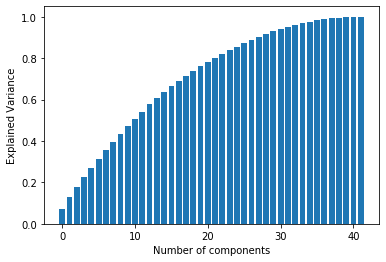

In [116]:
scaler = preprocessing.StandardScaler().fit(df5)
df_S=scaler.transform(df5)
pca = PCA(42)
df_P=pca.fit_transform(df_S)
#Trans_X = TSNE(random_state=2498).fit_transform(data1)
eigenvalues = pca.explained_variance_ratio_
##plot explained variance over the number of compinents
n=42
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [117]:
for i in range(n):
    if list(eigenvalues[:i+1].cumsum())[i] >= 0.8:
        print('{} leading principal components are needed to cover 80%'.format(i+1))
        break

22 leading principal components are needed to cover 80%


In [146]:
df_C = df_P[:,:23]

In [147]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=2498)
    cluster_labels = km.fit_predict(df_C)
    #report average Silhouette score
    silhouette_avg = silhouette_score(df_C, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.1986020999963276
For n_clusters =3, the average silhouette_score is :0.2017064670166322
For n_clusters =4, the average silhouette_score is :0.04154346121974774
For n_clusters =5, the average silhouette_score is :0.02734059749861477
For n_clusters =6, the average silhouette_score is :0.03484930237903677
For n_clusters =7, the average silhouette_score is :0.030443960072996948
For n_clusters =8, the average silhouette_score is :0.010731071109178623
For n_clusters =9, the average silhouette_score is :0.022253934652594072
For n_clusters =10, the average silhouette_score is :0.06251760105298984


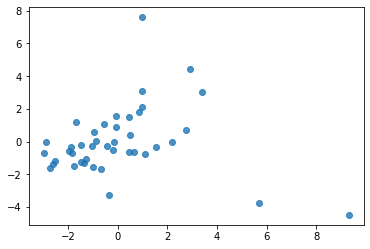

In [148]:
plt.plot(np.array(df_C[:,0]), np.array(df_C[:,1]),'o', alpha=0.8, label=True)

(-3.5872657196617075, 9.924725595677565, -5.103442694689945, 8.220188048783967)

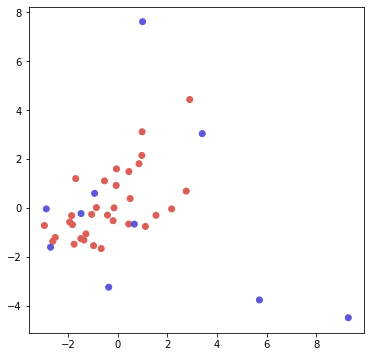

In [249]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=8.8,min_samples=5).fit_predict(df_C)
palette = np.array(sns.color_palette("hls", 3))
f = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(df_C[:,0], df_C[:,1], c=palette[dbscan])
ax.axis('tight')

In [250]:
df_top5['label']=dbscan

import geopandas as gpd
tzs=gpd.read_file('Arizona/Arizona_Zip_ShapeFile.shp')
labels = {ind: df_top5.label[ind] for ind in df_top5.index}
tzs['labels'] = tzs.ZIP_CODE.map(labels)

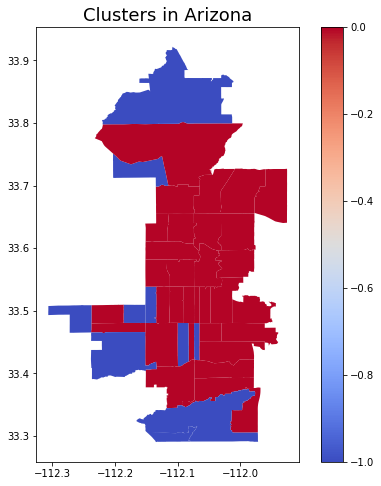

In [251]:
gdf = tzs.dropna(how='any', axis=0)
f, ax = plt.subplots(1, figsize=(8, 8))
ax.set_title("Clusters in Arizona", fontsize=18)
gdf.plot(axes=ax, column='labels', legend = True, cmap='coolwarm')

In [254]:
df_top5.loc[df_top5['label']==-1]

,geometry,Mean_Income,Median_Income,Population,Top1,Top2,Top3,Top4,Top5,label
ZIP_CODE,,,,,,,,,,
85004,POLYGON ((-112.0650820002341 33.48020200042203...,67493,33862,5355,Bar,Other,Coffee,Arts & Entertainment,Breakfast,-1
85048,POLYGON ((-111.9720469996693 33.30544999961785...,129249,101546,26115,Beauty & Spas,Other,Bar,Doctors,Mexican,-1
85086,"POLYGON ((-112.0115629999325 33.8644099998217,...",116539,94526,31696,Shopping,Home Services,Other,Pizza,Automotive,-1
85007,POLYGON ((-112.0913769996488 33.48047400037484...,56228,31396,10777,Mexican,Bar,Arts & Entertainment,Other,Home Services,-1
85037,POLYGON ((-112.2376940003778 33.50878099994327...,60335,53938,35090,Health & Medical,Mexican,Automotive,Barbers,Burger,-1
85019,POLYGON ((-112.1343619998064 33.48047300032874...,41671,31815,17694,Mexican,Automotive,Pizza,Flooring,Auto Parts & Supplies,-1
85043,POLYGON ((-112.1518010000161 33.46594999969278...,56958,48559,24254,Home Services,Automotive,Mexican,Hotels & Travel,Sandwiches,-1
85031,"POLYGON ((-112.1516650000397 33.5095080001941,...",38226,30213,20949,Mexican,Burger,Chinese,Shopping,Automotive,-1
85045,POLYGON ((-112.0800164002367 33.29107880004665...,151792,134517,5450,Home Services,Local Services,Advertising,Null,Null,-1


In [253]:
df_top5.loc[df_top5['label']==0]

,geometry,Mean_Income,Median_Income,Population,Top1,Top2,Top3,Top4,Top5,label
ZIP_CODE,,,,,,,,,,
85013,POLYGON ((-112.0737509998087 33.53831600038319...,78337,51889,17105,Shopping,Health & Medical,Bar,Mexican,Other,0
85032,"POLYGON ((-111.9775309998557 33.6550759996577,...",65305,51763,55693,Shopping,Automotive,Beauty & Spas,Health & Medical,Bar,0
85050,POLYGON ((-111.9603079997144 33.72602000042275...,120496,86359,22404,Beauty & Spas,Bar,Shopping,Health & Medical,Active Life,0
85016,POLYGON ((-111.9953600000639 33.55366000020888...,84153,55156,28528,Bar,Shopping,Home Services,Other,Beauty & Spas,0
85020,"POLYGON ((-112.037965999831 33.59676499960511,...",73009,49332,26724,Automotive,Mexican,Home Services,Shopping,Health & Medical,0
85033,POLYGON ((-112.1863149998374 33.50961399968639...,45817,37497,41622,Mexican,Pizza,Other,Beauty & Spas,Chinese,0
85015,POLYGON ((-112.0911202998619 33.53850929976443...,44028,33532,28552,Health & Medical,Automotive,Home Services,Beauty & Spas,Chinese,0
85024,POLYGON ((-112.0085300003592 33.72649900002887...,85131,75070,18844,Home Services,Automotive,Shopping,Health & Medical,Beauty & Spas,0
85022,"POLYGON ((-112.0304870002748 33.596671999813, ...",72157,51240,40790,Other,Automotive,Pizza,Bar,Burger,0


#   

In [270]:
df_top10 = df_top10.set_index('ZIP_CODE')

In [271]:
categorical10 = df_top10[['Top1', 'Top2', 'Top3', 'Top4', 'Top5','Top6','Top7','Top8','Top9','Top10']]

In [276]:
c = pd.get_dummies(categorical10)

In [277]:
df10 = pd.merge(c,other,left_index=True, right_index=True)

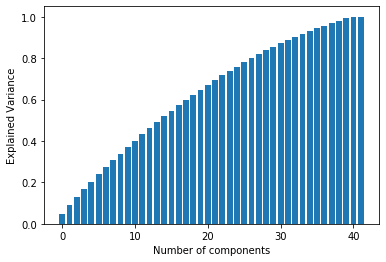

In [279]:
scaler = preprocessing.StandardScaler().fit(df10)
df_S=scaler.transform(df10)
pca = PCA(42)
df_P=pca.fit_transform(df_S)
#Trans_X = TSNE(random_state=2498).fit_transform(data1)
eigenvalues = pca.explained_variance_ratio_
##plot explained variance over the number of compinents
n=42
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [280]:
for i in range(n):
    if list(eigenvalues[:i+1].cumsum())[i] >= 0.8:
        print('{} leading principal components are needed to cover 80%'.format(i+1))
        break

28 leading principal components are needed to cover 80%


In [281]:
df_C = df_P[:,:30]

(-3.833427011536123, 13.06555656264897, -6.676992442619196, 9.285750403622947)

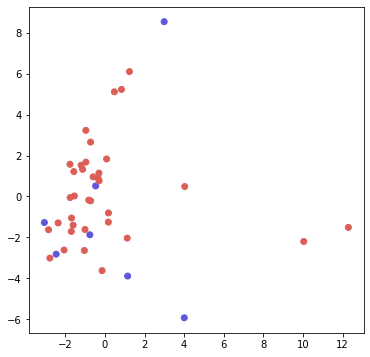

In [315]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=15.8).fit_predict(df_C)
palette = np.array(sns.color_palette("hls", 3))
f = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(df_C[:,0], df_C[:,1], c=palette[dbscan])
ax.axis('tight')

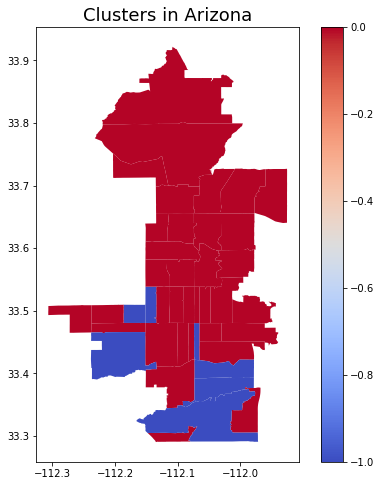

In [316]:
df_top10['label']=dbscan

import geopandas as gpd
tzs=gpd.read_file('Arizona/Arizona_Zip_ShapeFile.shp')
labels = {ind: df_top10.label[ind] for ind in df_top10.index}
tzs['labels'] = tzs.ZIP_CODE.map(labels)
gdf = tzs.dropna(how='any', axis=0)
f, ax = plt.subplots(1, figsize=(8, 8))
ax.set_title("Clusters in Arizona", fontsize=18)
gdf.plot(axes=ax, column='labels', legend = True, cmap='coolwarm')